In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# 이미지 준비

In [2]:
%%bash
[ ! -f flower_photos_300x200_small_train_test2.zip ]&& wget https://raw.githubusercontent.com/Finfra/AI_Vision/master/data/flower_photos_300x200_small_train_test2.zip

rm -rf __MACOSX
rm -rf flowers
unzip -q flower_photos_300x200_small_train_test2.zip
mv flower_photos_300x200_small_train_test2 flowers

cd flowers
# files=$(find |grep "\.jpg$\|\.png$")
# for i in $files; do
#     # convert $i -quiet  -resize 300x200^ -gravity center -extent 300x200  -colorspace Gray    ${i%.*}.png
#     convert $i -quiet  -resize 300x200^ -gravity center -extent 300x200  -define png:color-type=2   ${i%.*}.png
    
#     # identify ${i%.*}.png
#     rm -f $i
# done

find .|grep .DS_Store|xargs rm -f
find .|head -n 10


.
./test
./test/tulip
./test/tulip/13529687904_3d60abb479_n.jpg
./test/tulip/13530690445_9f1f5cf43a_n.jpg
./test/tulip/12025042086_78bafc0eb6_n.jpg
./test/tulip/13513851673_9d813dc7b0.jpg
./test/tulip/13514136074_ab1b827e4f.jpg
./test/tulip/13910737760_c71c8b6ff2.jpg
./test/tulip/12024561754_ce9667e4dc_n.jpg


In [3]:
from os import listdir
from os.path import isfile, join, splitext
import cv2
def getFolder(thePath,isFile=True):
    return [f for f in listdir(thePath) if isFile == isfile(join(thePath, f)) ]

def convert(thePath,to_w,to_h):
    ext=splitext(".jpg")[0]
    if ext in ('.jpg','.png'):
      img = cv2.imread(thePath)
      if (to_h,to_w,3) != img.shape :
        img = cv2.resize(img,(to_w,to_h))
        print(img.shape[0],img.shape[1],'to',to_w,to_h , thePath , )
        cv2.imwrite(thePath,img)
      # else:
      #   print(thePath,"is not changed (same)")

def convertAll(tPath,to_w,to_h):
  for folder in getFolder(tPath,False):
    print('-------------------')
    print(join(tPath,folder))
    convertAll(join(tPath,folder),to_w,to_h)
  for files in getFolder(tPath,True):
      convert(join(tPath,files),to_w,to_h)


tPath='/content/flowers/'


In [4]:
w=300
h=200
color=3

convertAll(tPath,w,h)


-------------------
/content/flowers/test
-------------------
/content/flowers/test/tulip
-------------------
/content/flowers/test/daisy
-------------------
/content/flowers/train
-------------------
/content/flowers/train/tulip
-------------------
/content/flowers/train/daisy


In [5]:
!apt install tree
!tree -d flowers
# dir(ImageDataGenerator)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
flowers
├── test
│   ├── daisy
│   └── tulip
└── train
    ├── daisy
    └── tulip

6 directories


# Image Loading

In [6]:


# load and iterate training dataset
datagen = ImageDataGenerator()
train_data = datagen.flow_from_directory(directory='flowers/train/', class_mode='categorical', batch_size=64,target_size=(200, 300))
# load and iterate test dataset
test_data = datagen.flow_from_directory(directory='flowers/test/',  class_mode='categorical', batch_size=64,target_size=(200,300))


Found 165 images belonging to 2 classes.
Found 35 images belonging to 2 classes.


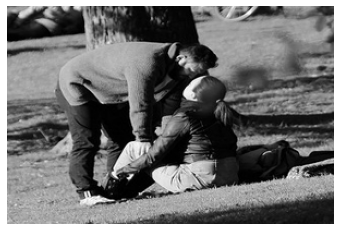

In [7]:
from google.colab.patches import cv2_imshow
import cv2
images,labels=test_data.next()
img=images[2]
plt.axis(False)
plt.imshow(img/255)
# == cv2_imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

import numpy as np

In [9]:

model = models.Sequential()
model.add(layers.Conv2D(96, (13, 13), activation='relu', padding='same', input_shape=(h,w, color)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((3, 3)))


model.add(layers.Conv2D(64, (7, 7), activation='relu', padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(layers.Dropout(0.2))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((3, 3)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Flatten())

model.add(layers.Dense(200, activation='tanh',kernel_regularizer='l1'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 300, 96)      48768     
_________________________________________________________________
dropout (Dropout)            (None, 200, 300, 96)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 100, 96)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 66, 100, 64)       301120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 66, 100, 64)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 33, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 33, 64)        1

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit_generator(train_data, 
                    validation_data=test_data, 
                    validation_steps=8,
                    epochs=100
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
3/3 [==============================] - 2s 563ms/step - loss: 39.8113 - accuracy: 0.4909 - val_loss: 38.4508 - val_accuracy: 0.5714
Epoch 2/100
3/3 [==============================] - 1s 205ms/step - loss: 38.0247 - accuracy: 0.6121
Epoch 3/100
3/3 [==============================] - 1s 192ms/step - loss: 36.5957 - accuracy: 0.7091
Epoch 4/100
3/3 [==============================] - 1s 221ms/step - loss: 34.9319 - accuracy: 0.7636
Epoch 5/100
3/3 [==============================] - 1s 209ms/step - loss: 33.5379 - accuracy: 0.7576
Epoch 6/100
3/3 [==============================] - 1s 189ms/step - loss: 32.1432 - accuracy: 0.8061
Epoch 7/100
3/3 [==============================] - 1s 190ms/step - loss: 30.6622 - accuracy: 0.8242
Epoch 8/100
3/3 [==============================] - 1s 207ms/step - loss: 29.1133 - accuracy: 0.8182
Epoch 9/100
3/3 [==============================] - 1s 187ms/step - loss: 27.7779 

In [11]:
score = model.evaluate_generator(test_data, steps=124)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
Test loss: 0.7701433897018433
Test accuracy: 0.7428571581840515


In [12]:
# cf) https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/